In [2]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
from collections import defaultdict
import nibabel as nib
from tqdm import tqdm
from skimage.measure import marching_cubes_lewiner
import meshplot as mp
import matplotlib.pyplot as plt

## Visualize Ground Truth mask and Predicted mask side by side

In [3]:
PREDICTIONS_BASE_PATH=Path(r'G:\Projects and Work\Mouse Heart Segmentation\Trained Weights - Mice\imagenet\Unet_se_resnext50_32x4d\Outputs')
subject = 'C57-UmaControl#1-MicroCT-070120 - Cardiac CT_115114-systole'  # You can change the subject name
gt_path=os.path.join(PREDICTIONS_BASE_PATH,subject,'ground_truth_mask.nii.gz')

if os.path.exists(gt_path):
    ground_truth_mask=np.array(nib.load(gt_path).get_fdata())
else:
    ground_truth_mask=None
predicted_mask=np.array(nib.load(os.path.join(PREDICTIONS_BASE_PATH,subject,'prediction_mask.nii.gz')).get_fdata())

In [4]:
def dice_coef2(y_true, y_pred):
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    union = np.sum(y_true_f) + np.sum(y_pred_f)
    if union==0: return 1
    intersection = np.sum(y_true_f * y_pred_f)
    return 2. * intersection / union
if ground_truth_mask is not None:
    print(dice_coef2(ground_truth_mask,predicted_mask)*100)

88.54812833250665


In [5]:
v1,f1,_,_ = marching_cubes_lewiner(predicted_mask)
if ground_truth_mask is not None:
    v2,f2,_,_ = marching_cubes_lewiner(ground_truth_mask)

C:\Users\SHAHER~1\AppData\Local\Temp/ipykernel_16568/2905357023.py:1: FutureWarning: marching_cubes_lewiner is deprecated in favor of marching_cubes. marching_cubes_lewiner will be removed in version 0.19
  v1,f1,_,_ = marching_cubes_lewiner(predicted_mask)
C:\Users\SHAHER~1\AppData\Local\Temp/ipykernel_16568/2905357023.py:3: FutureWarning: marching_cubes_lewiner is deprecated in favor of marching_cubes. marching_cubes_lewiner will be removed in version 0.19
  v2,f2,_,_ = marching_cubes_lewiner(ground_truth_mask)


### Predicted Mask

In [6]:
p = mp.plot(v1, f1,c=v1[:,0], return_plot=True)
# p.add_points(v1 + 200, c=v1[:,2] );


C:\Users\Shaheryar\anaconda3\envs\condaenv\lib\site-packages\jupyter_client\session.py:716: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(234.0, 34…

### Ground Truth mask

In [7]:
if ground_truth_mask is not None:
    p = mp.plot(v2, f2,c=v2[:,0],return_plot=True)
# p.add_points(v2 + 200, c=v2[:,2] );

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(305.0, 32…

### Analyzing Models

In [3]:
# best_metrics={}
# best_loss={}
# all_models = os.listdir("../Trained Weights - Mice/imagenet")
# for k in all_models:
#     df=pd.read_csv(os.path.join("../Trained Weights - Mice/imagenet",k,"validation_logs.csv"))
#     best_metrics[k]=max(df['iou_score'])
#     best_loss[k]=min(df['dice_loss'])

In [6]:
# print(best_loss)

{'Unet_densenet121': 0.1794795536746582, 'Unet_efficientnet-b2': 0.1934455251321196, 'Unet_resnet101': 0.2116582989692687, 'Unet_resnet34': 0.1672538745527466, 'Unet_se_resnext50_32x4d': 0.179100918273131}


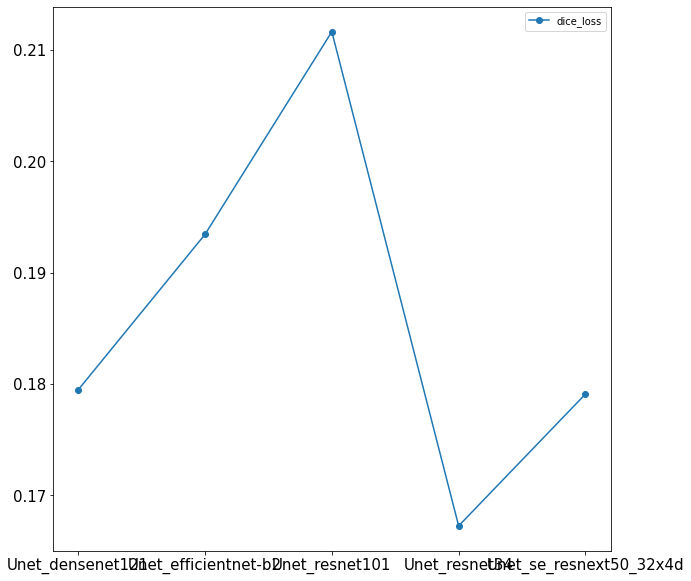

In [7]:
# plt.figure(figsize=(10,10))
# plt.rc('xtick', labelsize=15) 
# plt.rc('ytick', labelsize=15) 


# plt.plot(best_metrics.keys(),best_loss.values(),"-o")
# # plt.plot(best_metrics.keys(),best_loss.values(),"o")


# # plt.plot("a", list(best_metrics.values())[0], "v")
# # plt.plot("b", list(best_metrics.values())[0], "d")
# # plt.plot("c", list(best_metrics.values())[0], "x")
# plt.legend(["dice_loss"])
